# UPDATE DEPENDENCIES

In [283]:
# IRIS DATA SET
# https://archive.ics.uci.edu/dataset/53/iris

# XG BOOST DOCS
# https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost_hyperparameters.html

In [284]:
!pip install --upgrade xgboost
!pip install --upgrade scipy
!pip install --upgrade scikit-learn
!pip install --upgrade matplotlib

# PREPARE DATA

In [285]:
import urllib.request
urllib.request.urlretrieve('https://archive.ics.uci.edu/static/public/53/iris.zip','data.zip')


('data.zip', <http.client.HTTPMessage at 0x7f4dfaf3e9b0>)

/tmp/ipykernel_8929/2265072760.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[4] = data[4].replace('Iris-versicolor',2)


DATA      4    0    1    2    3
0    0  5.1  3.5  1.4  0.2
1    0  4.9  3.0  1.4  0.2
2    0  4.7  3.2  1.3  0.2
3    0  4.6  3.1  1.5  0.2
4    0  5.0  3.6  1.4  0.2
..  ..  ...  ...  ...  ...
145  1  6.7  3.0  5.2  2.3
146  1  6.3  2.5  5.0  1.9
147  1  6.5  3.0  5.2  2.0
148  1  6.2  3.4  5.4  2.3
149  1  5.9  3.0  5.1  1.8

[150 rows x 5 columns]
X        0    1    2    3
0    5.6  2.9  3.6  1.3
1    5.8  2.7  4.1  1.0
2    6.5  3.0  5.5  1.8
3    5.5  3.5  1.3  0.2
4    6.7  3.3  5.7  2.1
..   ...  ...  ...  ...
145  5.5  2.6  4.4  1.2
146  6.7  2.5  5.8  1.8
147  5.6  3.0  4.5  1.5
148  7.7  2.6  6.9  2.3
149  6.3  2.5  4.9  1.5

[150 rows x 4 columns]
y 0      2
1      2
2      1
3      0
4      1
      ..
145    2
146    1
147    2
148    1
149    2
Name: 4, Length: 150, dtype: int64
X-data        0    1    2    3
0    5.6  2.9  3.6  1.3
1    5.8  2.7  4.1  1.0
2    6.5  3.0  5.5  1.8
3    5.5  3.5  1.3  0.2
4    6.7  3.3  5.7  2.1
..   ...  ...  ...  ...
145  5.5  2.6  4.4  1.

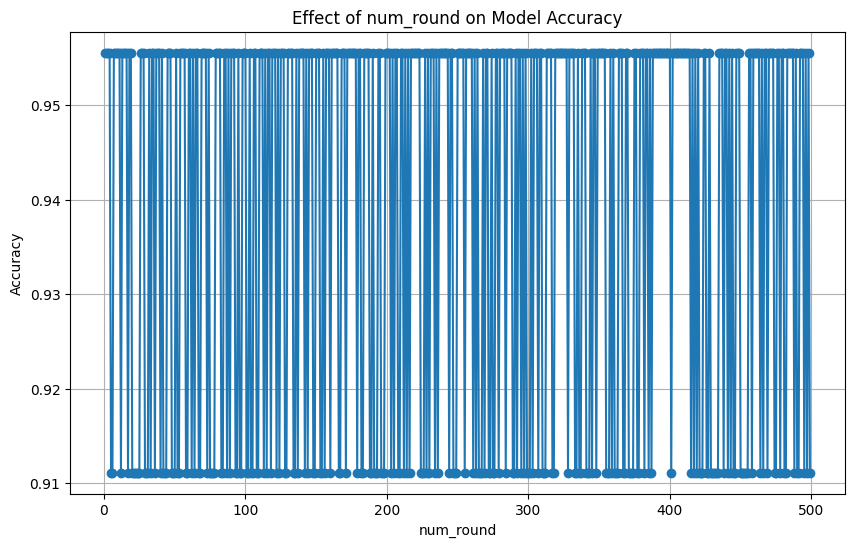

In [341]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb  # Import xgboost

data = pd.read_csv('iris-data/iris.data', header=None)

# convert to numerical values
data[4] = data[4].replace('Iris-setosa',0)
data[4] = data[4].replace('Iris-virginica',1)
data[4] = data[4].replace('Iris-versicolor',2)
data = data[[4,0,1,2,3]]
print('DATA', data)

new_values = [
    [5.0, 3.6, 1.4, 0.2, 2],  # Iris-setosa
    [6.0, 2.9, 4.5, 1.5, 2],  # Iris-versicolor
    [6.5, 3.2, 5.1, 2.0, 1],  # Iris-virginica
    [5.9, 3.0, 5.1, 1.8, 1]  # Iris-virginica
]

new_rows = pd.DataFrame(new_values)
#data = pd.concat([data, new_rows], ignore_index=True)

data = data.sample(frac=1).reset_index(drop=True)

# Split features (X) and target (y), assuming the first column (0) is the label
X_features = data.drop(4, axis=1)  # Features (all columns except column 0)
y_labels = data[4]  # Target labels (column 0)

print('X', X_features)
print('y', y_labels)

X_features.to_csv('iris-data/X-features-data.csv', index=False, header=False)
y_labels.to_csv('iris-data/y-labels-data.csv', index=False, header=False)

X_data = pd.read_csv('iris-data/X-features-data.csv', header=None)
y_data = pd.read_csv('iris-data/y-labels-data.csv', header=None)

print('X-data', X_data)
print('y-data', y_data)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

print('X_train', X_train)
print('y_train', y_train)

print('X_test', X_test)
print('y_test', y_test)

print('TOTAL X_train: ',len(X_train))
print('TOTAL y_train: ', len(y_train))

print('TOTAL X_test: ', len(X_test))
print('TOTAL y_test: ', len(y_test))


num_rounds = [1,5,9,20]
accuracies = []
rounds = []
max_accuracy = 0

for x in range(1,500):
    max_depth = random.randint(1, 1)  # Random depth between 1 and 10
    learning_rate = random.uniform(0.01, 0.075)  # Random learning rate between 0.01 and 0.3
    n_estimators = random.randint(1, 1)  # Random number of estimators (boosting rounds)
    min_child_weight = random.randint(1, 1)  # Random min_child_weight between 1 and 10
    subsample = random.uniform(0.5, 0.643)  # Random subsample ratio between 0.5 and 1.0
    colsample_bytree = random.uniform(0.5, 1.0)  # Random colsample_bytree between 0.5 and 1.0
    gamma = random.uniform(0, 5)  # Random gamma between 0 and 5
    reg_lambda = random.uniform(0, 5)  # Random L2 regularization term
    reg_alpha = random.uniform(0, 3.4489)  # Random L1 regularization term
    
    # Configure and train the XGBoost model with the current num_round
    xgb_model = xgb.XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        reg_lambda=reg_lambda,
        reg_alpha=reg_alpha,
        objective='multi:softmax',  # For multiclass classification
        num_class=3  # Assuming 3 classes
    )
    
    xgb_model.fit(X_train,y_train)

    y_pred = None
    y_pred = xgb_model.predict(X_test)
    
    print("TEST:", y_test.values.flatten())
    print("PRED:", y_pred)
    
    # Calculate accuracy for the current num_round
    accuracy = accuracy_score(y_test, y_pred)
    rounds.append(x)
    accuracies.append(accuracy)
    
    if(accuracy >= max_accuracy):
        max_accuracy = accuracy
        print(xgb_model.get_params())
        print(f"num_round: {num_round}, Accuracy: {accuracy:.3f}")

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracies, marker='o')
plt.title('Effect of num_round on Model Accuracy')
plt.xlabel('num_round')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
